------------------Data Loading----------------------

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
from google.colab import files
upload = files.upload()

Saving friends_train.json to friends_train.json


In [3]:
from google.colab import files
upload = files.upload()

Saving friends_test.json to friends_test.json


In [4]:
from google.colab import files
upload = files.upload()

Saving friends_dev.json to friends_dev.json


In [5]:
import pandas as pd
import json

# Load data from friends_test.json using pd.read_json
with open('friends_test.json', 'r') as file:
    friends_test_data = pd.read_json(file)

# Load data from friends_train.json using pd.read_json
with open('friends_train.json', 'r') as file:
    friends_train_data = pd.read_json(file)

# Load data from friends_dev.json using pd.read_json
with open('friends_dev.json', 'r') as file:
    friends_dev_data = pd.read_json(file)

# Merge DataFrames from both files
friends_df = pd.concat([friends_test_data, friends_train_data,friends_dev_data], ignore_index=True)



In [6]:
import pandas as pd

# Convert merged data (list of dictionaries) to DataFrame
data = pd.DataFrame(friends_df)


In [7]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,"{'speaker': 'Mark', 'utterance': 'Why do all y...","{'speaker': 'Rachel', 'utterance': 'Oh. Thats...","{'speaker': 'Rachel', 'utterance': 'Y'know wha...","{'speaker': 'Ross', 'utterance': 'It didnt.',...","{'speaker': 'Frank', 'utterance': 'Okay, so wh...","{'speaker': 'Joey', 'utterance': 'Now, wh-what...","{'speaker': 'Frank', 'utterance': 'Its so coo...","{'speaker': 'Ross', 'utterance': 'Yeah, yeah.'...","{'speaker': 'Joey', 'utterance': 'Why cant I ...","{'speaker': 'Ross', 'utterance': 'Dont ask me...",...,"{'speaker': 'Frank', 'utterance': 'Its out th...","{'speaker': 'Joey', 'utterance': 'Then you hol...","{'speaker': 'Frank', 'utterance': 'All right, ...","{'speaker': 'Joey', 'utterance': 'All right, c...",None,None,None,None,None,None
1,"{'speaker': 'Joey', 'utterance': 'Come on, Lyd...","{'speaker': 'Joey', 'utterance': 'Push!', 'emo...","{'speaker': 'Joey', 'utterance': 'Push 'em out...","{'speaker': 'Joey', 'utterance': 'Push 'em out...","{'speaker': 'Joey', 'utterance': 'Let's get th...","{'speaker': 'Joey', 'utterance': 'Let's I wa...","{'speaker': 'Joey', 'utterance': 'Push!', 'emo...","{'speaker': 'Joey', 'utterance': 'Push!', 'emo...",None,None,...,None,None,None,None,None,None,None,None,None,None
2,"{'speaker': 'Ross', 'utterance': 'Okay.', 'emo...","{'speaker': 'Rachel', 'utterance': 'Ross, didn...","{'speaker': 'Ross', 'utterance': 'Uhh, yes I d...","{'speaker': 'Ross', 'utterance': 'Okay, go lef...","{'speaker': 'Rachel', 'utterance': 'Okay, y'kn...","{'speaker': 'Ross', 'utterance': 'Oh okay, lif...","{'speaker': 'Ross', 'utterance': 'Straight up ...","{'speaker': 'Ross', 'utterance': 'You can do i...","{'speaker': 'Ross', 'utterance': 'You can do i...","{'speaker': 'Ross', 'utterance': 'Okay.', 'emo...",...,"{'speaker': 'Ross', 'utterance': 'Yes but too ...","{'speaker': 'Steve', 'utterance': 'Okay, fine,...","{'speaker': 'Ross', 'utterance': 'Ugh, can you...","{'speaker': 'Phoebe', 'utterance': 'Yeah. I re...",None,None,None,None,None,None
3,"{'speaker': 'Phoebe', 'utterance': 'Ohh!', 'em...","{'speaker': 'Monica', 'utterance': 'What?', 'e...","{'speaker': 'Phoebe', 'utterance': 'It kicked!...","{'speaker': 'Monica', 'utterance': 'Oh my God!...","{'speaker': 'Phoebe', 'utterance': 'Oh no wait...","{'speaker': 'Joey', 'utterance': 'Oh my God! I...","{'speaker': 'Monica', 'utterance': 'Oh wait, J...","{'speaker': 'Joey', 'utterance': 'Look, I know...","{'speaker': 'Joey', 'utterance': 'Theyre just...","{'speaker': 'Chandler', 'utterance': 'Youre c...",...,"{'speaker': 'Chandler', 'utterance': 'So uh, w...","{'speaker': 'Marjorie', 'utterance': 'I talk i...","{'speaker': 'Chandler', 'utterance': 'What a c...","{'speaker': 'Joey', 'utterance': 'So why dont...",None,None,None,None,None,None
4,"{'speaker': 'Joey', 'utterance': 'Previously o...","{'speaker': 'Monica', 'utterance': 'I dont kn...","{'speaker': 'Phoebe', 'utterance': 'Oh?!', 'em...","{'speaker': 'Monica', 'utterance': 'Yeah, but ...","{'speaker': 'Phoebe', 'utterance': 'Oh.', 'emo...","{'speaker': 'Joey', 'utterance': 'And its not...","{'speaker': 'Chandler', 'utterance': 'Yeah, it...","{'speaker': 'Monica', 'utterance': 'So you can...","{'speaker': 'Ross', 'utterance': 'Yeah, anythi...","{'speaker': 'Monica', 'utterance': 'Whats fis...",...,None,None,None,None,None,None,None,None,None,None


-------------Effective execution of tokenization,
stemming/lemmatization, and stop words removal-----------------

In [8]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string



# Load NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize lemmatizer and define stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Preprocessing function
def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text)

    # Convert tokens to lowercase and remove punctuation
    tokens = [token.lower() for token in tokens if token not in string.punctuation]

    # Remove stop words and lemmatize tokens
    preprocessed_tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]

    return preprocessed_tokens

# Preprocess each row in the DataFrame
preprocessed_data = []
for i, row in data.iterrows():
    speaker = row[0]['speaker']
    utterance = row[0]['utterance']
    emotion = row[0]['emotion']
    annotation = row[0]['annotation']

    # Preprocess utterance text
    preprocessed_utterance = preprocess_text(utterance)

    # Append preprocessed data to list
    preprocessed_data.append({
        'speaker': speaker,
        'utterance': preprocessed_utterance,
        'emotion': emotion,
        'annotation': annotation
    })

# Create a new DataFrame from the preprocessed data
preprocessed_data = pd.DataFrame(preprocessed_data)




[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [9]:
preprocessed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   speaker     1000 non-null   object
 1   utterance   1000 non-null   object
 2   emotion     1000 non-null   object
 3   annotation  1000 non-null   object
dtypes: object(4)
memory usage: 31.4+ KB


In [14]:
preprocessed_data.head(10)

,speaker,utterance,emotion,annotation
0,Mark,"[youre, coffee, mug, number, bottom]",surprise,2000030
1,Joey,"[come, lydia]",neutral,3200000
2,Ross,[okay],neutral,5000000
3,Phoebe,[ohh],surprise,0000050
4,Joey,"[previously, friend]",neutral,5000000
5,Jade,"[oh, bob, nothing, compared, bite, lip, keep, ...",non-neutral,1200002
6,Phoebe,"[coming, oh, coming, oh, hello, hi, right, com...",non-neutral,1101020
7,Rachel,"[well, phoebe, got, ta, something]",non-neutral,0102011
8,Ross,"[whats, guy, fighting, really, room, mean, si...",non-neutral,1000211
9,Roger,[oh],neutral,3000020


-------------Emotion Visualization-------

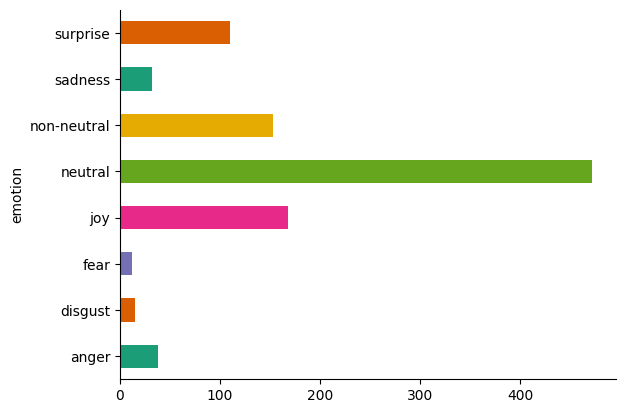

In [18]:
# @title emotion

from matplotlib import pyplot as plt
import seaborn as sns
preprocessed_data.groupby('emotion').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

-------- Checking Missing Values -------------

In [19]:
preprocessed_data.isnull().sum()


speaker       0
utterance     0
emotion       0
annotation    0
dtype: int64

In [20]:
preprocessed_data.head(10)

,speaker,utterance,emotion,annotation
0,Mark,"[youre, coffee, mug, number, bottom]",surprise,2000030
1,Joey,"[come, lydia]",neutral,3200000
2,Ross,[okay],neutral,5000000
3,Phoebe,[ohh],surprise,0000050
4,Joey,"[previously, friend]",neutral,5000000
5,Jade,"[oh, bob, nothing, compared, bite, lip, keep, ...",non-neutral,1200002
6,Phoebe,"[coming, oh, coming, oh, hello, hi, right, com...",non-neutral,1101020
7,Rachel,"[well, phoebe, got, ta, something]",non-neutral,0102011
8,Ross,"[whats, guy, fighting, really, room, mean, si...",non-neutral,1000211
9,Roger,[oh],neutral,3000020


----------------Use of TF-IDF to convert text
into numerical data-----------------------


In [21]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer


# Join preprocessed tokens back into strings for vectorization
preprocessed_data['utterance'] = preprocessed_data['utterance'].apply(lambda tokens: ' '.join(tokens))

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the 'utterance' column to TF-IDF features
tfidf_features = tfidf_vectorizer.fit_transform(preprocessed_data['utterance'])

# Convert TF-IDF features to DataFrame
tfidf_df = pd.DataFrame(tfidf_features.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Concatenate the TF-IDF DataFrame with the original DataFrame
final_data = pd.concat([preprocessed_data[['speaker', 'emotion', 'annotation']], tfidf_df], axis=1)

# Now 'final_data' contains the TF-IDF transformed numerical features along with speaker, emotion, and annotation columns


-----------SVM for Emotion Classification-----------------

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score


# Splitting data into features (X) and target (y)
X = final_data.drop(['speaker', 'emotion', 'annotation'], axis=1)  # Features (TF-IDF)
y = final_data['emotion']  # Target (emotion labels)

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize SVM classifier
svm_classifier = SVC()

# Define hyperparameter grid to search
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly']  # Kernel type
}

# Initialize GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=svm_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Parameters:", best_params)
print("Best Cross-validation Score (accuracy): {:.2f}".format(best_score))

# Predict using the best model from GridSearchCV
best_svm_classifier = grid_search.best_estimator_
y_pred = best_svm_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Test Set Accuracy: {:.2f}".format(accuracy))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Optionally, perform cross-validation to validate the model
cv_scores = cross_val_score(best_svm_classifier, X, y, cv=5)
print("\nCross-validation Scores (accuracy):", cv_scores)
print("Mean Cross-validation Score: {:.2f}".format(cv_scores.mean()))


Best Parameters: {'C': 1, 'kernel': 'linear'}
Best Cross-validation Score (accuracy): 0.52
Test Set Accuracy: 0.50

Classification Report:
              precision    recall  f1-score   support

       anger       0.00      0.00      0.00         8
     disgust       0.00      0.00      0.00         3
        fear       0.00      0.00      0.00         3
         joy       0.63      0.32      0.42        38
     neutral       0.49      0.88      0.63        91
 non-neutral       0.12      0.04      0.06        28
     sadness       1.00      0.25      0.40         4
    surprise       0.60      0.24      0.34        25

    accuracy                           0.50       200
   macro avg       0.36      0.22      0.23       200
weighted avg       0.46      0.50      0.43       200



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Cross-validation Scores (accuracy): [0.555 0.525 0.505 0.505 0.535]
Mean Cross-validation Score: 0.53


----------K-Means Clustering----------

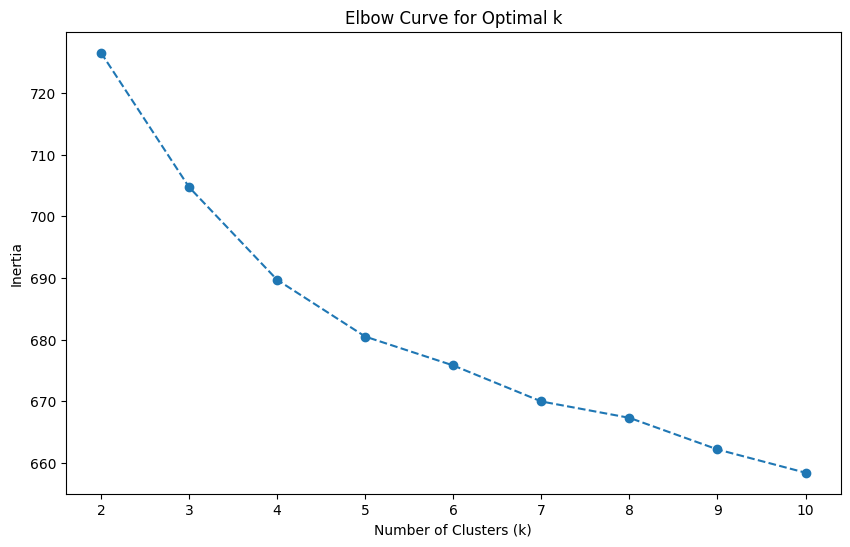

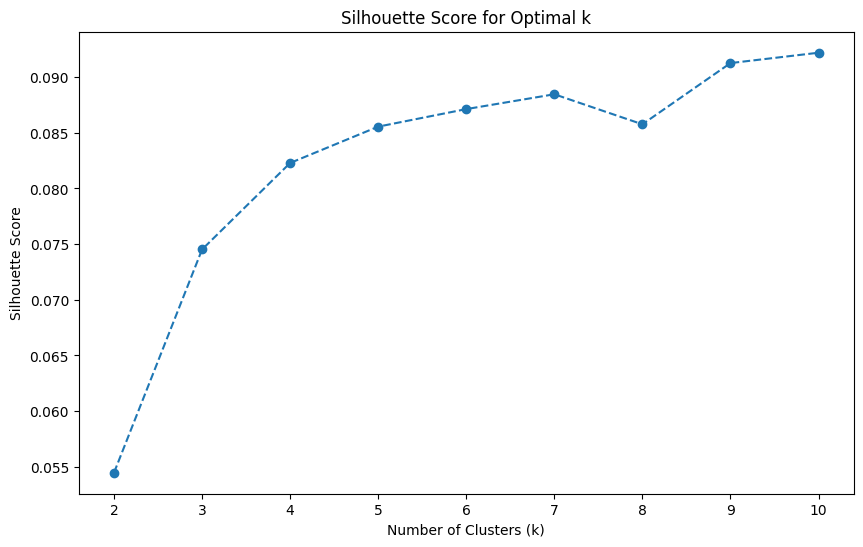

emotion  anger  disgust  fear  joy  neutral  non-neutral  sadness  surprise
cluster                                                                    
0           26       10     9   81      281           96       25        60
1            0        0     0   26       20           10        0         1
2            0        0     0   11       19            1        0         0
3            3        0     0    4       44            8        1         0
4            1        2     0    8       17           10        2        24


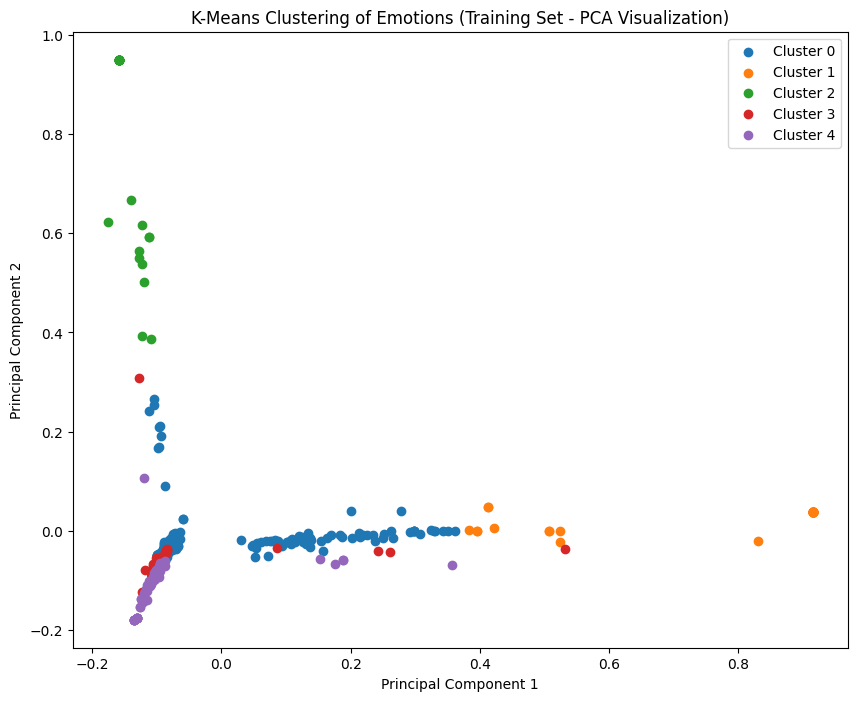

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split



# Splitting data into features (X) and target (y)
X = final_data.drop(['speaker', 'emotion', 'annotation'], axis=1)  # Features (TF-IDF)
y = final_data['emotion']  # Target (emotion labels)

# Splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reduce dimensions for visualization (optional)
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

# Initialize list to store inertia values (sum of squared distances to nearest centroid)
inertia_values = []

# Test different numbers of clusters (k) using K-Means on the training set
for k in range(2, 11):  # Testing k from 2 to 10 clusters
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_train)
    inertia_values.append(kmeans.inertia_)  # Append inertia value to list

# Plotting the Elbow curve to determine optimal number of clusters
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), inertia_values, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve for Optimal k')
plt.xticks(range(2, 11))
plt.show()

# Calculate silhouette scores to assess cluster quality
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X_train)
    silhouette_avg = silhouette_score(X_train, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plotting Silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k')
plt.xticks(range(2, 11))
plt.show()

# Based on the Elbow curve and/or Silhouette scores, choose the optimal number of clusters (k)
optimal_k = 5

# Perform K-Means clustering with the optimal number of clusters on the training set
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels_train = kmeans.fit_predict(X_train)

# Add cluster labels to the training set DataFrame
X_train['cluster'] = cluster_labels_train

# Interpret clusters by examining patterns corresponding to different emotions in the training set
cluster_emotion_counts_train = X_train.groupby(['cluster', y_train]).size().unstack(fill_value=0)
print(cluster_emotion_counts_train)

# Visualize clusters (optional, using PCA for dimensionality reduction) for training set
plt.figure(figsize=(10, 8))
for cluster in range(optimal_k):
    plt.scatter(X_train_pca[cluster_labels_train == cluster, 0],
                X_train_pca[cluster_labels_train == cluster, 1],
                label=f'Cluster {cluster}')
plt.title('K-Means Clustering of Emotions (Training Set - PCA Visualization)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()
